## Machine Learning HW#2

**Task 1** 

For the Titanic challenge we need to guess whether the individuals from the test dataset had survived or not. Please:

**1) Preprocess your Titanic training data**
   
   
Some of the Preprocessing steps were done in Homework # 1. 


In [1]:
# Import the needed libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data

train_df = pd.read_csv(r'C:\Users\cinti\Documents\PythonF\DM\Titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\cinti\Documents\PythonF\DM\Titanic\test.csv')

**Treating Missing values:** 

In [3]:
print('Missing values at the Training set:')
print(train_df.isnull().sum())
print('\nMissing values at the Test set:')
print(test_df.isnull().sum())

Missing values at the Training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values at the Test set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
## Age: Replacing missing values using random numbers using the standard deviation and the mean

# Test set:

mean_age = train_df['Age'].mean()
std_age = train_df['Age'].std()
is_null_age = train_df['Age'].isnull().sum()
print(f'Training set: Number of null values for Age feature before: {is_null_age}')
random_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = is_null_age)
age_slice = train_df['Age'].copy()
age_slice[np.isnan(age_slice)] = random_age
train_df['Age'] = age_slice
train_df['Age'] = train_df['Age'].astype(int)
is_null_age = train_df['Age'].isnull().sum()
print(f'Training set: Number of null values for Age feature : {is_null_age}')

# Train set:

mean_age_test = test_df['Age'].mean()
std_age_test = test_df['Age'].std()
is_null_age_test = test_df['Age'].isnull().sum()
print(f'\nTest set: Number of null values for Age feature before: {is_null_age_test}')
random_age_test = np.random.randint(mean_age_test - std_age_test, mean_age_test + std_age_test, size = is_null_age_test)
age_slice_test = test_df['Age'].copy()
age_slice_test[np.isnan(age_slice_test)] = random_age_test
test_df['Age'] = age_slice_test
test_df['Age'] = test_df['Age'].astype(int)
is_null_age_test = test_df['Age'].isnull().sum()
print(f'Test set: Number of null values for Age feature : {is_null_age_test}')

Training set: Number of null values for Age feature before: 177
Training set: Number of null values for Age feature : 0

Test set: Number of null values for Age feature before: 86
Test set: Number of null values for Age feature : 0


In [5]:
## Cabin feature: 

#Percentage of null values in the Cabin feature: 

n_null = train_df['Cabin'].isnull().sum() + test_df['Cabin'].isnull().sum()
total = train_df.shape[0] + test_df.shape[0]
print(f'Total null values: {n_null}') 
print(f'Percentage of null values:', (n_null/total * 100))

Total null values: 1014
Percentage of null values: 77.46371275783041


In [6]:
# Due to the high percentage of missing values (77%) - the cabin feature should be dropped from the model 

train_df = train_df.drop(columns = 'Cabin')
test_df = test_df.drop(columns = 'Cabin')

In [7]:
## Embarked feature 

# It contains two missing values in the trainig set: Complete using the mode

is_null_embarked = train_df['Embarked'].isnull().sum()
print(f'Number of null values for Embarked feature before: {is_null_embarked}')
most_commom = train_df['Embarked'].mode()
print(f'Most common value in Embarked: {most_commom}')
train_df['Embarked'] = train_df['Embarked'].fillna('S')
is_null_embarked = train_df['Embarked'].isnull().sum()
print(f'Number of null values for Embarked feature : {is_null_embarked}')

Number of null values for Embarked feature before: 2
Most common value in Embarked: 0    S
dtype: object
Number of null values for Embarked feature : 0


In [8]:
## Fare Feature

# It contains one missing value in the test set: Complete using the mode

most_commom2 = test_df['Fare'].mode()
print(most_commom2)
print(f'Most common value in Fare: {most_commom2}')
test_df['Fare'] = test_df['Fare'].fillna(7.75)
is_null_fare = test_df['Fare'].isnull().sum()
print(f'Number of null values for Fare feature : {is_null_fare}')

0    7.75
dtype: float64
Most common value in Fare: 0    7.75
dtype: float64
Number of null values for Fare feature : 0


**Treating duplicates** 

In [9]:
## Check for duplicate rows  - No rows are duplicate

duplicate = train_df.duplicated()
duplicates_rows = duplicate.sum()
print(duplicates_rows)

0


In [10]:
## Ticket feature 
# Check the duplicates:

duplicate_train = train_df.duplicated(subset=['Ticket'])
duplicate_test = test_df.duplicated(subset=['Ticket'])
duplicates_ticket = duplicate_train.sum() + duplicate_test.sum()
total_ticket = train_df['Ticket'].count() + test_df['Ticket'].count()
rate = duplicates_ticket / total_ticket
print(total_ticket)
print(duplicates_ticket)
print(f'Rate of duplicates : {rate}' )

1309
265
Rate of duplicates : 0.20244461420932008


In [11]:
# Drop Ticket feature due to the rate of duplicates and no clear correlation with Survived

train_df = train_df.drop(columns = 'Ticket')
test_df = test_df.drop(columns = 'Ticket')

In [12]:
# Other than Ticket and Cabin, Name and PassengerID can be dropped they don't help determining survival per HW1

train_df = train_df.drop(columns = ['Name', 'PassengerId'])
test_df = test_df.drop(columns = ['Name', 'PassengerId'])

**Categorical Features**

In [13]:
## Sex: 
# Code Male = 0 and Female = 1 

train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
print('Trainning set')
print(train_df['Sex'])

test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
print('Test set')
print(test_df['Sex'])

Trainning set
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32
Test set
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int32


In [14]:
## Embarked  
# Create Dummy variables: 
# If Embarked_Q and Embarked_S are zero = the passenger embarked at C 

train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
print('train_df')
print(train_df)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)
print('\ntest_df:')
print(test_df)

train_df
     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0           0       3    0   22      1      0   7.2500           0           1
1           1       1    1   38      1      0  71.2833           0           0
2           1       3    1   26      0      0   7.9250           0           1
3           1       1    1   35      1      0  53.1000           0           1
4           0       3    0   35      0      0   8.0500           0           1
..        ...     ...  ...  ...    ...    ...      ...         ...         ...
886         0       2    0   27      0      0  13.0000           0           1
887         1       1    1   19      0      0  30.0000           0           1
888         0       3    1   32      1      2  23.4500           0           1
889         1       1    0   26      0      0  30.0000           0           0
890         0       3    0   32      0      0   7.7500           1           0

[891 rows x 9 columns]

test_df:
     Pcla

**Create Bands for Age and Fare features**  

In [15]:
## Age: 

# Find bans for Age feature: 

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
print('train_df')
print(train_df)
test_df['AgeBand'] = pd.cut(test_df['Age'], 5)
print('\ntest_df:')
print(test_df)

train_df
     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  \
0           0       3    0   22      1      0   7.2500           0   
1           1       1    1   38      1      0  71.2833           0   
2           1       3    1   26      0      0   7.9250           0   
3           1       1    1   35      1      0  53.1000           0   
4           0       3    0   35      0      0   8.0500           0   
..        ...     ...  ...  ...    ...    ...      ...         ...   
886         0       2    0   27      0      0  13.0000           0   
887         1       1    1   19      0      0  30.0000           0   
888         0       3    1   32      1      2  23.4500           0   
889         1       1    0   26      0      0  30.0000           0   
890         0       3    0   32      0      0   7.7500           1   

     Embarked_S       AgeBand  
0             1  (16.0, 32.0]  
1             0  (32.0, 48.0]  
2             1  (16.0, 32.0]  
3             1  (32.0

In [16]:
## Age: 
# Map according to the AgeBand: 

datasets = [train_df, test_df]

for dataset in datasets: 
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
train_df = train_df.drop(columns = 'AgeBand')
test_df = test_df.drop(columns = 'AgeBand')
print('train_df')
print(train_df)
print('\ntest_df:')
print(test_df)

train_df
     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0           0       3    0    1      1      0   7.2500           0           1
1           1       1    1    2      1      0  71.2833           0           0
2           1       3    1    1      0      0   7.9250           0           1
3           1       1    1    2      1      0  53.1000           0           1
4           0       3    0    2      0      0   8.0500           0           1
..        ...     ...  ...  ...    ...    ...      ...         ...         ...
886         0       2    0    1      0      0  13.0000           0           1
887         1       1    1    1      0      0  30.0000           0           1
888         0       3    1    1      1      2  23.4500           0           1
889         1       1    0    1      0      0  30.0000           0           0
890         0       3    0    1      0      0   7.7500           1           0

[891 rows x 9 columns]

test_df:
     Pcla

In [17]:
## Fare
# Map according to FareBand:  

datasets = [train_df, test_df]

for dataset in datasets:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

print('train_df')
print(train_df)
print('\ntest_df:')
print(test_df)

train_df
     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S
0           0       3    0    1      1      0     0           0           1
1           1       1    1    2      1      0     3           0           0
2           1       3    1    1      0      0     1           0           1
3           1       1    1    2      1      0     3           0           1
4           0       3    0    2      0      0     1           0           1
..        ...     ...  ...  ...    ...    ...   ...         ...         ...
886         0       2    0    1      0      0     1           0           1
887         1       1    1    1      0      0     2           0           1
888         0       3    1    1      1      2     2           0           1
889         1       1    0    1      0      0     2           0           0
890         0       3    0    1      0      0     0           1           0

[891 rows x 9 columns]

test_df:
     Pclass  Sex  Age  SibSp  Parch  Fare  Em

**2) Select a set of important features. Please show your selected features and explain how you perform feature selection.**
I will perform two feature selection models: Logistic Regression - better because we do not infer the number of features we want in the model and Recursive Feature Selection with n = 5,  n = 3 and n =2 

In [18]:
# Logistic Regression

X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

# Linear Model
linmodel = LogisticRegression()
linmodel.fit(X,y)
#Select From Model 
model = SelectFromModel(linmodel,prefit=True)
ix = model.get_support() 
features = pd.DataFrame(model.transform(X), columns = X.columns.values[ix]) 
features


,Pclass,Sex
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,1
889,1,0


In [19]:
# Verification of the model using the selected  features
X = train_df[['Sex','Pclass']]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linmodel = LogisticRegression()
linmodel.fit(X_train, y_train)
predictions = linmodel.predict(X_test)
print('accuracy score selected features')
print(accuracy_score(y_test, predictions))

# Model with all features 
X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linmodel = LogisticRegression()
linmodel.fit(X_train, y_train)
predictions = linmodel.predict(X_test)
print('accuracy score full model')
print(accuracy_score(y_test, predictions))

accuracy score selected features
0.7873134328358209
accuracy score full model
0.8097014925373134


In [20]:
#Recursive Feature Selection

X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

# Linear Model
linmodel = LogisticRegression()
linmodel.fit(X,y)

# Recursive Feature Selection n = 2
model = RFE(linmodel,n_features_to_select=2)
model.fit(X,y)
ix = model.get_support() 

features_2 = pd.DataFrame(model.transform(X), columns = X.columns.values[ix]) 
print('2 Features')
print(features_2)

# Recursive Feature Selection n = 3
model = RFE(linmodel,n_features_to_select=3)
model.fit(X,y)
ix = model.get_support() 

features_3 = pd.DataFrame(model.transform(X), columns = X.columns.values[ix])
print('3 Features')
print(features_3)

# Recursive Feature Selection n = 5
model = RFE(linmodel,n_features_to_select=5)
model.fit(X,y)
ix = model.get_support() 

features_5 = pd.DataFrame(model.transform(X), columns = X.columns.values[ix])
print('5 Features')
print(features_5)

2 Features
     Pclass  Sex
0         3    0
1         1    1
2         3    1
3         1    1
4         3    0
..      ...  ...
886       2    0
887       1    1
888       3    1
889       1    0
890       3    0

[891 rows x 2 columns]
3 Features
     Pclass  Sex  Embarked_S
0         3    0           1
1         1    1           0
2         3    1           1
3         1    1           1
4         3    0           1
..      ...  ...         ...
886       2    0           1
887       1    1           1
888       3    1           1
889       1    0           0
890       3    0           0

[891 rows x 3 columns]
5 Features
     Pclass  Sex  Age  SibSp  Embarked_S
0         3    0    1      1           1
1         1    1    2      1           0
2         3    1    1      0           1
3         1    1    2      1           1
4         3    0    2      0           1
..      ...  ...  ...    ...         ...
886       2    0    1      0           1
887       1    1    1      0           

In [21]:
# Verification of the model using three selected features

X = train_df[['Sex','Pclass', 'Age']]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linmodel = LogisticRegression()
linmodel.fit(X_train, y_train)
predictions = linmodel.predict(X_test)
print(accuracy_score(y_test, predictions))

# Verification of the model using five selected features 
X = train_df[['Sex','Pclass', 'Age', 'SibSp', 'Embarked_S']]
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linmodel = LogisticRegression()
linmodel.fit(X_train, y_train)
predictions = linmodel.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7835820895522388
0.7947761194029851


The feature selection using two methods Select from Model and Recursive Feature Selection produced accuracy scores as follows: 
Select from Model selected 2 features : Sex and Pclass with accuracy : 0.7873
Forcing RFS for 3 features: Sex, Pclass and Age: 0.7985
Forcing RFS for 5 features: Sex, Pclass, Age, SibSp, Embarked_S: 0.7947

Accuracy obtained by the model with all the features = 0.8097. 

Comparing the reuslts, we can see that two features should be in the model: Pclass and Sex. 
However, since the amount of features is not large, the model with all features can be executed for comparison. In most cases this is not possible due to the amount of features in the model.

**3) Learn a decision tree model with the Titanic training data using Gini index, plot your decision tree;**

In [22]:
# Using all features for the Tree

X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree_gini = tree.DecisionTreeClassifier(criterion = 'gini')
tree_gini.fit(X_train, y_train)
predictions = tree_gini.predict(X_test)
giniscore = f1_score(y_test, predictions)
print('Accuracy Score _ Tree Full Model')
print(giniscore)

Accuracy Score _ Tree Full Model
0.6844919786096256


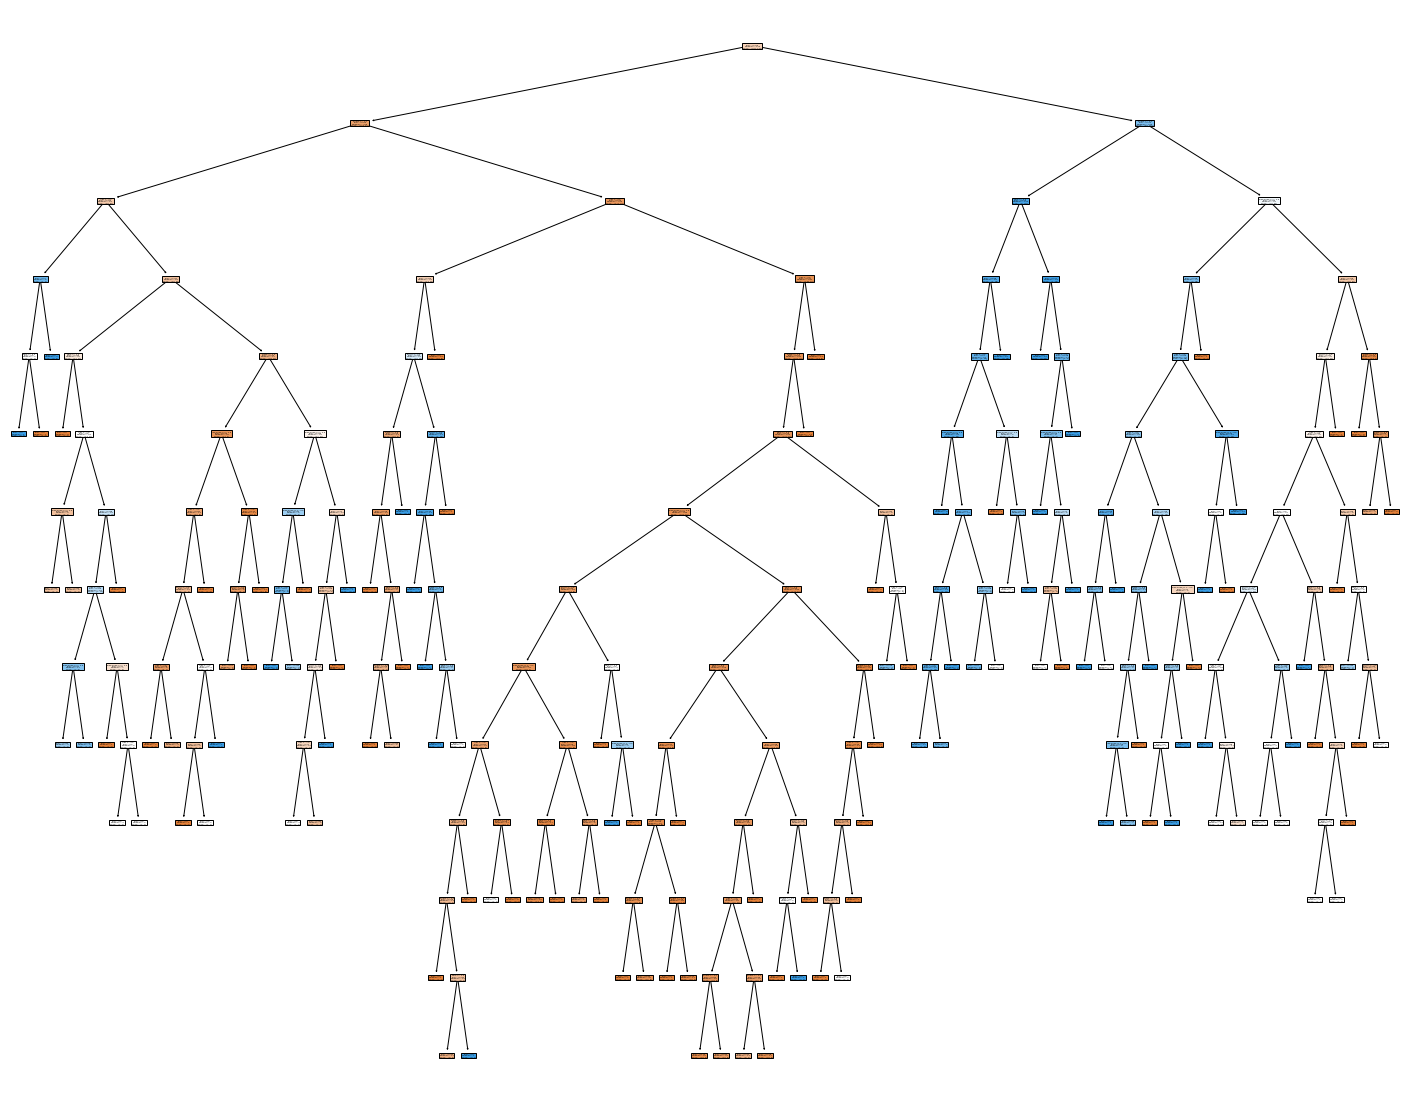

In [23]:
# Plot the tree 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_gini, feature_names=X.columns, filled = True)

In [24]:
# Using only 2 features: Sex and Pclass for the Tree  

X = train_df[['Sex','Pclass']]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree_gini = tree.DecisionTreeClassifier(criterion = 'gini')
tree_gini.fit(X_train, y_train)
predictions = tree_gini.predict(X_test)
giniscore = f1_score(y_test, predictions)
print('Accuracy Score _ Tree Model 2 features')
print(giniscore)


Accuracy Score _ Tree Model 2 features
0.7135678391959798


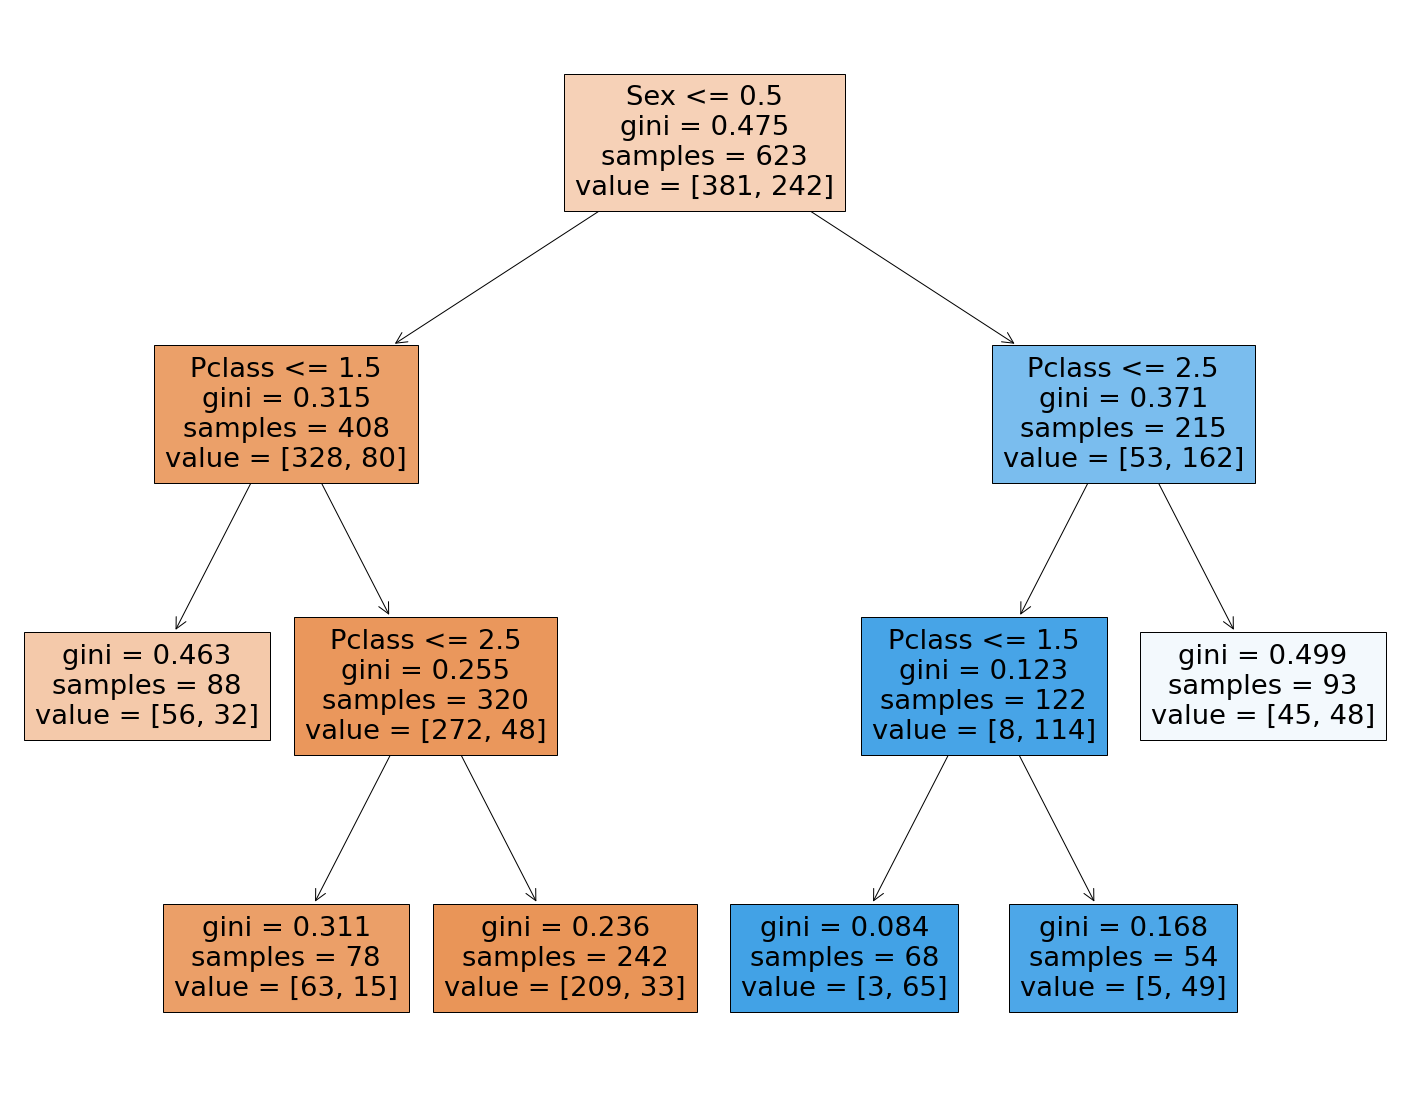

In [25]:
# Plot the tree 

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_gini, feature_names=X.columns, filled = True)

In [26]:
# Using only 3 features Sex, Pclass and Age for the Tree  

X = train_df[['Sex','Pclass', 'Age']]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree_gini = tree.DecisionTreeClassifier(criterion = 'gini')
tree_gini.fit(X_train, y_train)
predictions = tree_gini.predict(X_test)
giniscore = f1_score(y_test, predictions)
print('Accuracy Score _ Tree Model wiht 3 features')
print(giniscore)

Accuracy Score _ Tree Model wiht 3 features
0.6857142857142857


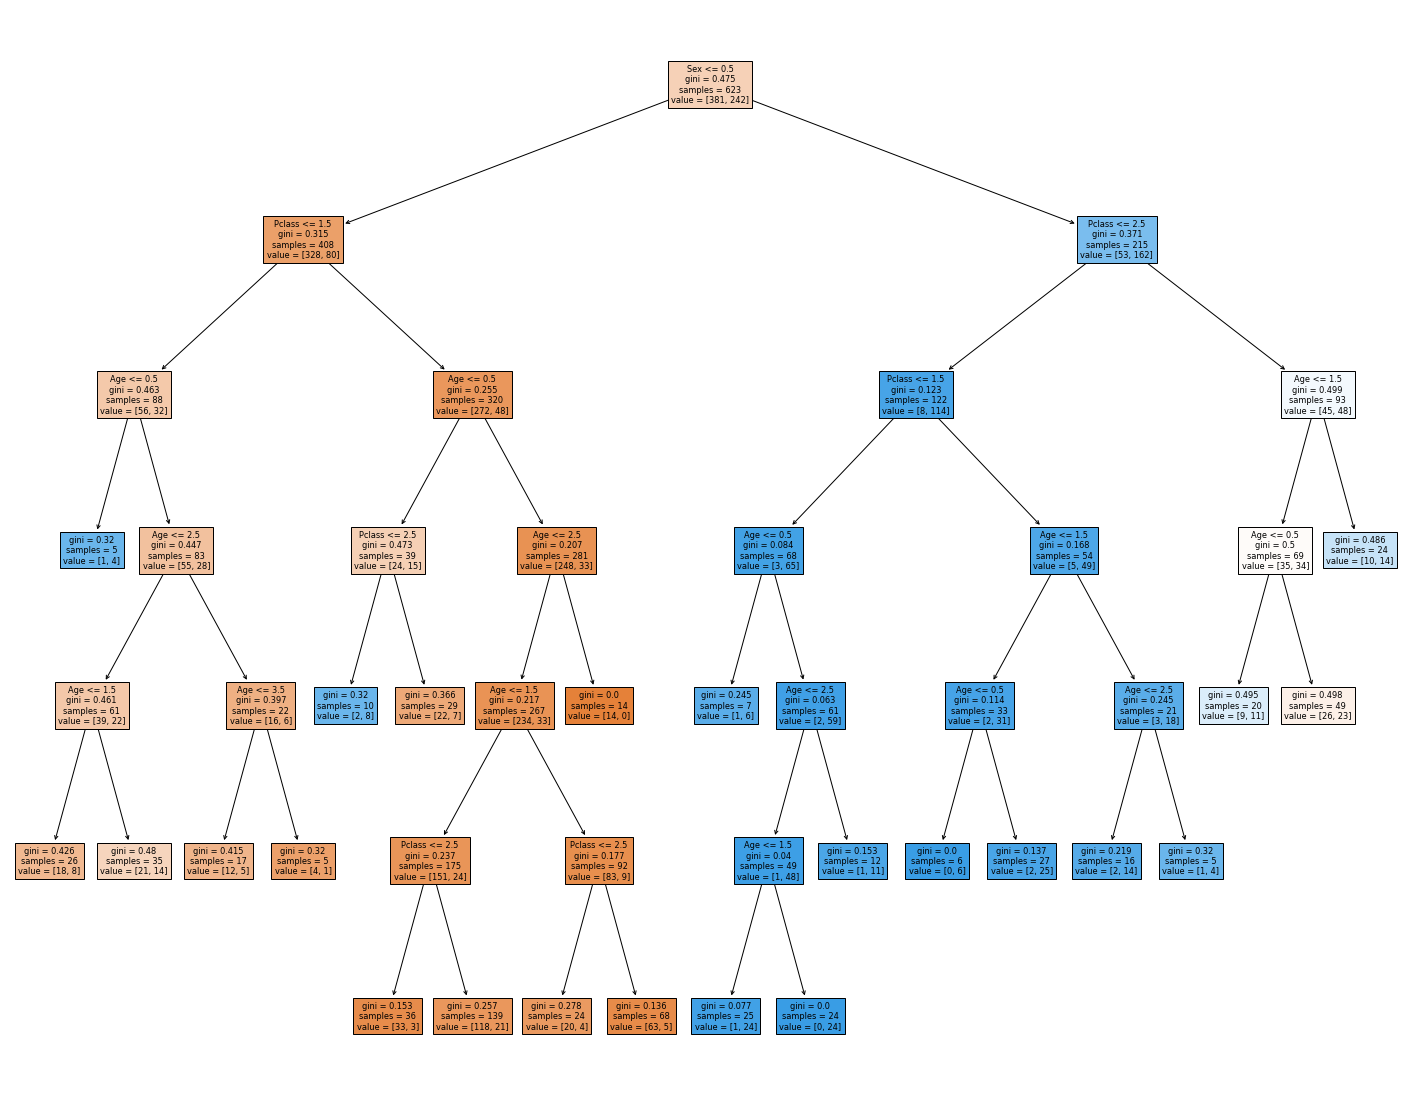

In [27]:
# Plot the tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_gini, feature_names=X.columns, filled = True)

Three decision tree models were generated:
- Full model (all features)
- Three features (Pclass, Sex, Age)
- Two features (Pclass and Sex)

The best test score was obtained using two features and it is equal to 0.7127

**4) Apply the five-fold cross validation of the decision tree learning algorithm to the Titanic training data to extract average classification accuracy;**

In [28]:
## Decision Tree

# 5 Cross Validation Fold

cv = KFold(n_splits=5)           
accuracies = list()
max_attributes = len(list(test_df))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train_df):
        f_train = train_df.loc[train_fold] 
        f_valid = train_df.loc[valid_fold]

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    print("Accuracy per fold: ", fold_accuracy, "\n")
    print("Average accuracy: ", avg)
    print("\n")
    
# Show the average results
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

Current max depth:  1 

Accuracy per fold:  [0.8156424581005587, 0.797752808988764, 0.7808988764044944, 0.7359550561797753, 0.8033707865168539] 

Average accuracy:  0.7867239972380893


Current max depth:  2 

Accuracy per fold:  [0.7821229050279329, 0.7640449438202247, 0.7808988764044944, 0.7359550561797753, 0.8033707865168539] 

Average accuracy:  0.7732785135898562


Current max depth:  3 

Accuracy per fold:  [0.8268156424581006, 0.7696629213483146, 0.7752808988764045, 0.7471910112359551, 0.8370786516853933] 

Average accuracy:  0.7912058251208336


Current max depth:  4 

Accuracy per fold:  [0.7653631284916201, 0.7865168539325843, 0.7865168539325843, 0.7752808988764045, 0.8426966292134831] 

Average accuracy:  0.7912748728893353


Current max depth:  5 

Accuracy per fold:  [0.8212290502793296, 0.7865168539325843, 0.7865168539325843, 0.7752808988764045, 0.8426966292134831] 

Average accuracy:  0.8024480572468772


Current max depth:  6 

Accuracy per fold:  [0.8044692737430168, 0

**5) Apply the five-fold cross validation of the random forest learning algorithm to the Titanic training data to extract average classification accuracy;**

In [29]:
# Random Forest Learning Algorithm 

# 5 Cross Validation Fold

cv = KFold(n_splits=5)           
accuracies = list()
max_attributes = len(list(test_df))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    rfc_model = RandomForestClassifier(max_depth = depth)
    print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train_df):
        f_train = train_df.loc[train_fold] 
        f_valid = train_df.loc[valid_fold]

        model = rfc_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    print("Accuracy per fold: ", fold_accuracy, "\n")
    print("Average accuracy: ", avg)
    print("\n")
    
# Show the average results
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

Current max depth:  1 

Accuracy per fold:  [0.7430167597765364, 0.7247191011235955, 0.7584269662921348, 0.7584269662921348, 0.7865168539325843] 

Average accuracy:  0.7542213294833972


Current max depth:  2 

Accuracy per fold:  [0.7653631284916201, 0.7640449438202247, 0.8033707865168539, 0.7191011235955056, 0.8258426966292135] 

Average accuracy:  0.7755445358106836


Current max depth:  3 

Accuracy per fold:  [0.7932960893854749, 0.7808988764044944, 0.8370786516853933, 0.7471910112359551, 0.848314606741573] 

Average accuracy:  0.8013558470905782


Current max depth:  4 

Accuracy per fold:  [0.8100558659217877, 0.8033707865168539, 0.8314606741573034, 0.7752808988764045, 0.8595505617977528] 

Average accuracy:  0.8159437574540205


Current max depth:  5 

Accuracy per fold:  [0.8379888268156425, 0.8089887640449438, 0.8033707865168539, 0.7696629213483146, 0.8595505617977528] 

Average accuracy:  0.8159123721047015


Current max depth:  6 

Accuracy per fold:  [0.8100558659217877, 0

In [30]:
# Decision Tree - max depth = 4 

X_train = train_df.drop("Survived",axis=1)
y_train = train_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
decision_tree_score = f1_score(y_test, predictions)
print(decision_tree_score)

0.6857142857142857


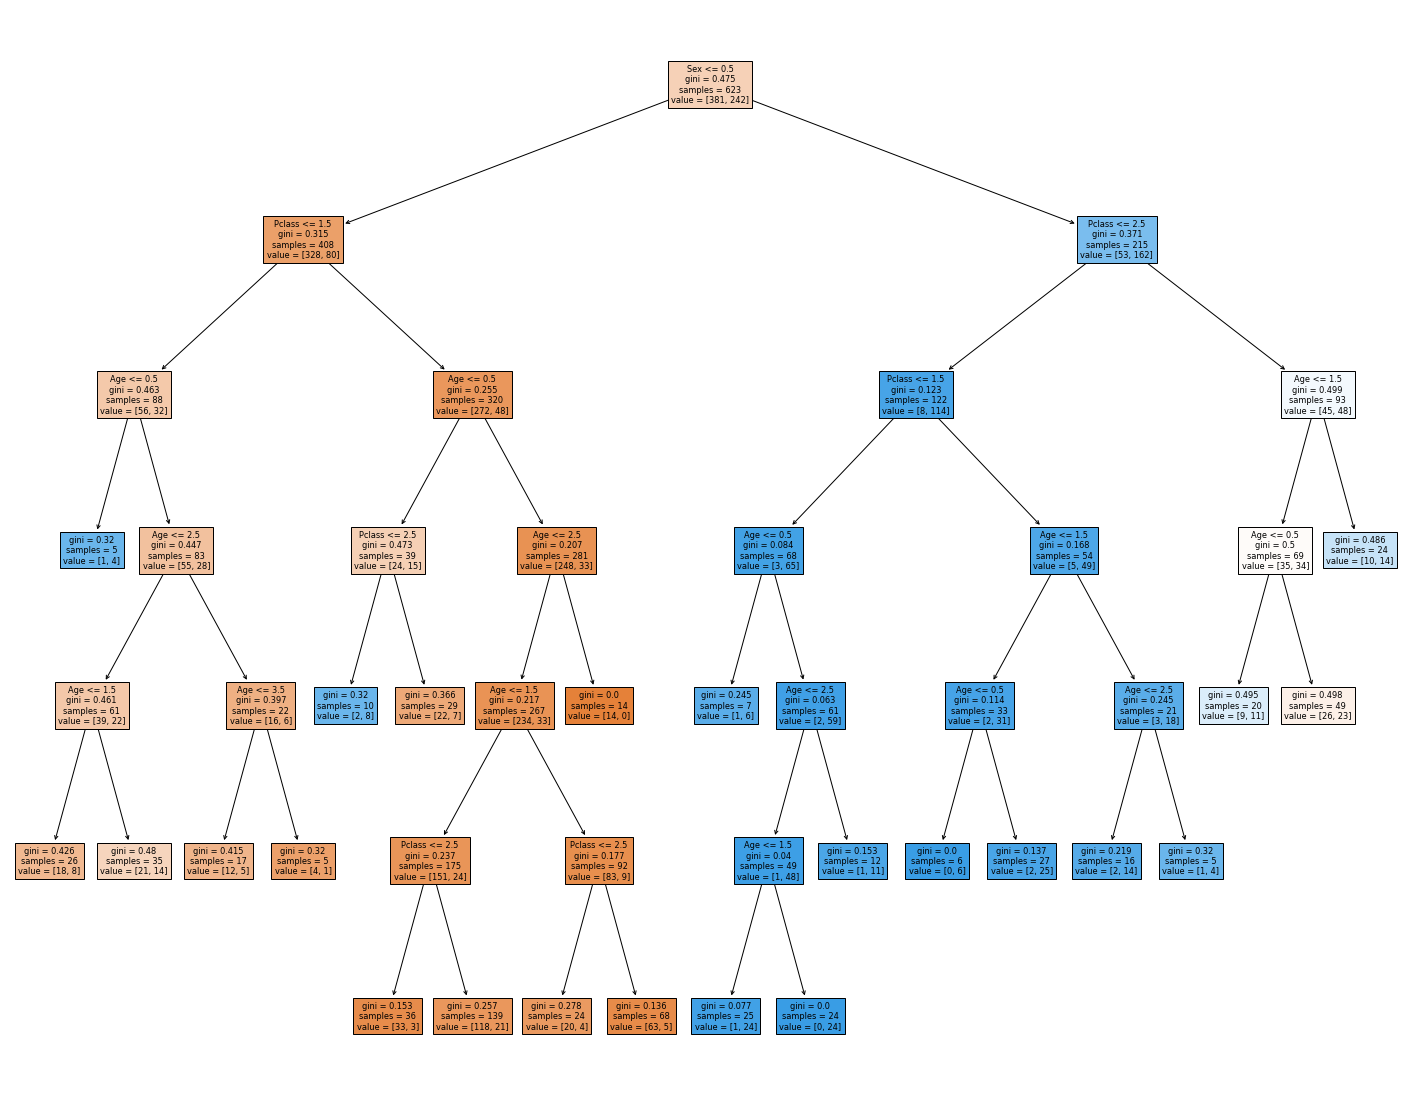

In [31]:
# Plot the tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_gini, feature_names=X.columns, filled = True)

In [32]:
# Random Forest Classifier - with the max_depth of 4 

X_train = train_df.drop("Survived",axis=1)
y_train = train_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(max_depth = 4)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
rfc_score = rfc.score(X_test, y_test)
print(rfc_score)

0.7947761194029851


In [33]:
# Using the Random Forest to predict the Survival of the test set: 

x_t = test_df[['Sex', 'Age', 'Pclass']]
predictions = rfc.predict(x_t)

check = pd.DataFrame({'Sex': test_df['Sex'], 'Survived': predictions})
print(check)

     Sex  Survived
0      0         0
1      1         1
2      0         0
3      0         0
4      1         1
..   ...       ...
413    0         0
414    1         1
415    0         0
416    0         0
417    0         0

[418 rows x 2 columns]


**6) Which algorithm is better, Decision Tree or Random Forest?**

In this case Random Forest outperfomed Decision Tree. Random Forest had an accuracy of 79% on the training dataset against less than 70% from the Decision Tree algorithm. Both using the max_depht of 4.  
Overall, Random Forest is considered a better algorithm to classification than Decision Tree.


**7) What are your observations and conclusions from the algorithm comparison and analysis?**

Random Forest consists of multiple trees that are based on random samples from the training dataset. Random Forest is known by overcoming problems encountered in the Decision Tree like overfitting and  instability. 
Also, Random Forest runs efficienty on large datasets and in less time than Decision Tree. 

In this analysis that is confirmed, Random Forest performed better than Decision Tree. 